# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Zuhdi
- **Email:** ahmadzuhdi.az2314@gmail.com
- **ID Dicoding:** ahmad_zuhdi

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim?
- Pertanyaan 2: Bagaimana perbedaan penggunaan sepeda antara hari kerja dan hari libur?
- Pertanyaan 3: Bagaimana distribusi penggunaan sepeda berdasarkan waktu dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
hour_data = pd.read_csv('hour.csv')
day_data = pd.read_csv('day.csv')

print(f"hour.csv memiliki {hour_data.shape[0]} baris dan {hour_data.shape[1]} kolom.")
print(f"day.csv memiliki {day_data.shape[0]} baris dan {day_data.shape[1]} kolom.")

all_df = pd.merge(hour_data, day_data, on=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], suffixes=('_hour', '_day'))
all_df.to_csv("main_data.csv", index=False)

hour.csv memiliki 17379 baris dan 17 kolom.
day.csv memiliki 731 baris dan 16 kolom.


**Insight:**
- Kedua file memiliki format dan jumlah data yang berbeda, dengan hour.csv berisi data per jam dan day.csv berisi data per hari.

### Assessing Data

In [3]:
hour_data.info

<bound method DataFrame.info of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0

In [4]:
day_data.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspee

In [5]:
hour_data.describe

<bound method NDFrame.describe of        instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81    

In [6]:
day_data.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windsp

**Insight:**
- Terlihat bahwa tidak ditemukan anomali yang signifikan pada struktur data. Semua kolom memiliki tipe data yang sesuai.

### Cleaning Data

In [7]:
duplicates_hour = hour_data.duplicated().sum()

In [8]:
duplicates_day = day_data.duplicated().sum()

In [9]:
hour_data = hour_data.drop_duplicates()

In [10]:
day_data = day_data.drop_duplicates()

In [11]:
missing_hour = hour_data.isnull().sum().sum()

In [12]:
missing_day = day_data.isnull().sum().sum()

**Insight:**
- Duplikat dihapus untuk menghindari bias dalam analisis, karena data yang berulang dapat memengaruhi hasil statistik dan interpretasi.
- Tidak ditemukan nilai yang hilang, sehingga data dapat langsung digunakan tanpa perlu imputasi atau pembuangan baris/kolom.

## Exploratory Data Analysis (EDA)

### Explore Data Analysis 1

In [13]:
# EDA 1
season_trend = day_data.groupby('season')['cnt'].mean()
print(season_trend) #Spring(1) Summer(2) Fall(3) Winter(4)

season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


### Explore Data Analysis 2

In [14]:
# EDA 2
workingday_comparison = day_data.groupby('workingday')['cnt'].mean()
print(workingday_comparison)

workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


### Explore Data Analysis 3

In [15]:
# EDA 3
hourly_distribution = hour_data.groupby('hr')['cnt'].mean()
print(hourly_distribution)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


**Insight:**
- Penyewaan sepeda cenderung lebih tinggi pada musim Fall, lebih tinggi pada hari kerja dibandingkan dengan hari libur, dan lebih tinggi pada pagi dan sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

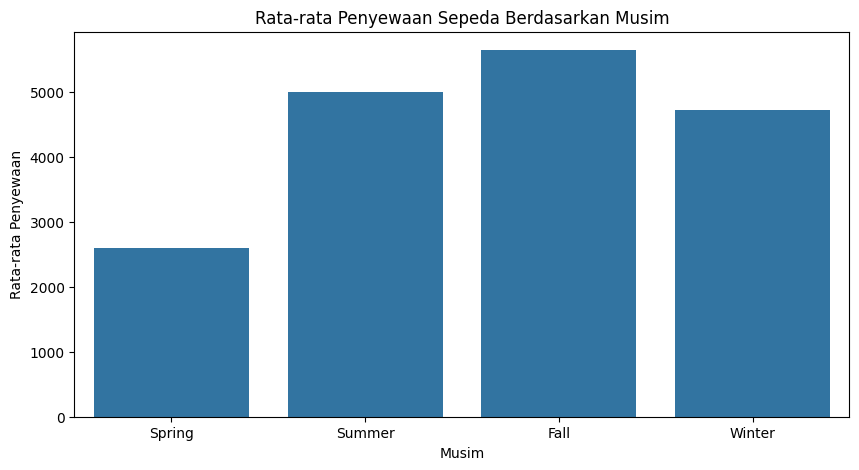

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=['Spring', 'Summer', 'Fall', 'Winter'], y=season_trend.values)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Musim dengan rata-rata penyewaan sepeda tertinggi adalah Fall.

### Pertanyaan 2:

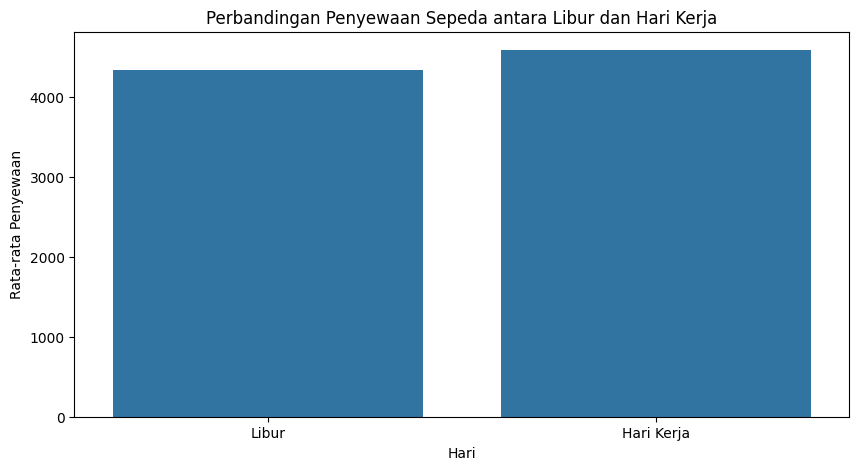

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=['Libur', 'Hari Kerja'], y=workingday_comparison.values)
plt.title('Perbandingan Penyewaan Sepeda antara Libur dan Hari Kerja')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Penyewaan sepeda lebih banyak terjadi pada hari kerja.

### Pertanyaan 3:

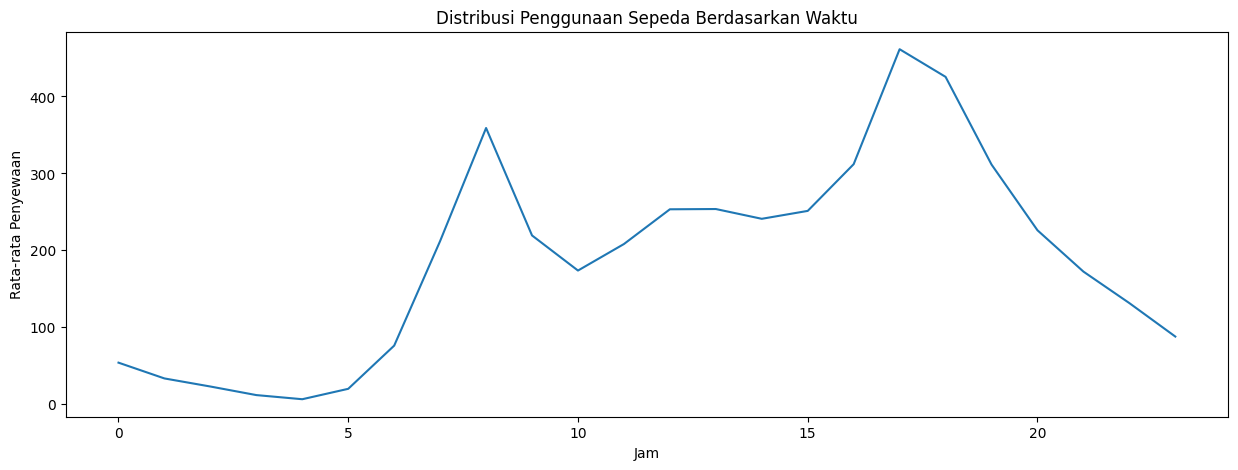

In [18]:
plt.figure(figsize=(15, 5))
sns.lineplot(x=hourly_distribution.index, y=hourly_distribution.values)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Waktu')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Jam sibuk penggunaan sepeda adalah pagi dan sore hari (jam 8-9 dan 17-18).

## Analisis Lanjutan (Opsional)

**Tujuan:**
- Sebenarnya selain membuat tantangan 3 tantangan bisnis, saya juga disini membuat analisis lanjutan sederhana, diantaranya menggunakan RFM Analysis dan clustering manual grouping, dimana hal ini tentunya akan menambah insight baru dari dataset sewa sepeda. Namun secara umum pada RFM Analysis disini untuk melihat transaski dalam rentang tertentu.

### RFM Analysis

In [19]:
# Mengelompokkan pelanggan berdasarkan perilaku pembelian
rfm = hour_data.groupby('dteday').agg({
    'hr': 'max',  # Recency: Jam terakhir transaksi per hari
    'instant': 'count',  # Frequency: Total transaksi per hari
    'cnt': 'sum'  # Monetary: Total penyewaan sepeda per hari
}).rename(columns={'hr': 'Recency', 'instant': 'Frequency', 'cnt': 'Monetary'})

print("RFM Analysis:")
print(rfm.head())

RFM Analysis:
            Recency  Frequency  Monetary
dteday                                  
2011-01-01       23         24       985
2011-01-02       23         23       801
2011-01-03       23         22      1349
2011-01-04       23         23      1562
2011-01-05       23         23      1600


**Insight:**
- Terlihat total penyewaan sepeda perhari paling tinggi ada di 2011-01-05, dan paling rendah pada 2011-01-02.

### Clustering Manual Grouping 1

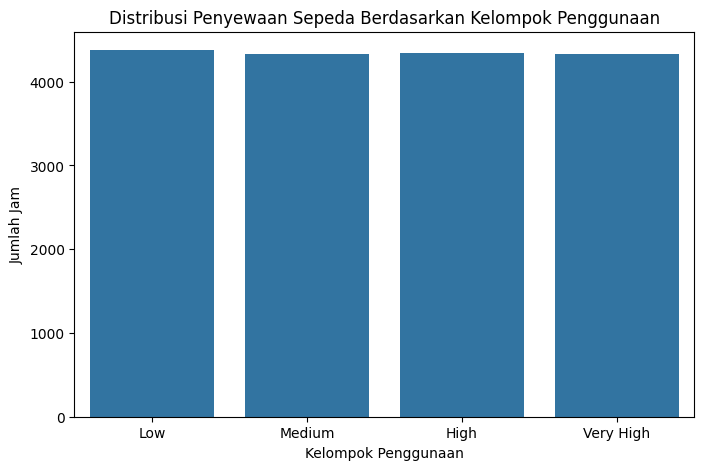

In [20]:
# Manual Grouping berdasarkan kuartil jumlah penyewaan sepeda
hour_data['usage_group'] = pd.qcut(hour_data['cnt'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
usage_distribution = hour_data['usage_group'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=usage_distribution.index, y=usage_distribution.values)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Kelompok Penggunaan')
plt.xlabel('Kelompok Penggunaan')
plt.ylabel('Jumlah Jam')
plt.show()

**Insight:**
- Perbedaannya tidak terlalu signifikan, tetapi penyewa sepeda paling banyak di kelompok low.

### Clustering Manual Grouping 2

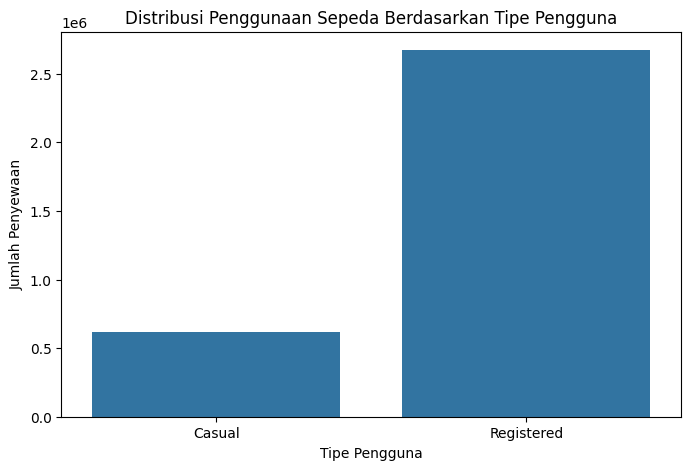

In [21]:
# Perbandingan jumlah penyewaan berdasarkan tipe pengguna
casual_vs_registered = hour_data[['casual', 'registered']].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=['Casual', 'Registered'], y=casual_vs_registered.values)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Tipe Pengguna')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Pengguna terdaftar menyumbang sebagian besar penyewaan sepeda dibandingkan pengguna kasual.

## Conclusion

- Pertanyaan 1: Tren penggunaan sepeda berdasarkan musim cenderung lebih tinggi pada musim Fall, diikuti musim Summer, lalu Winter dan Spring ternyata sepi peminat, tetapi dari 4 musim ini, yang perbedaan paling signifikan ada pada musim fall dan Spring.
- Pertanyaan 2: Perbedaan pengguna sepeda pada hari kerja dan hari libur terlihat lebih banyak terjadi pada hari kerja, naum perbedaan ini tidak terlalu signifikan karena keduanya berbeda tipis.
- Pertanyaan 3: Pengguna sepeda dalam sehari itu terlihat pada pagi dari jam 8 sampai 9 dan sore hari jam 17 sampai 18, tetapi meski dari jam 9 lewat menurun hingga jam 10, pengguna sepeda meningkat lagi sampai jam 17/18 sore dan menurun hingga jam 20 malam.

- Saran dan rekomendasi: Membuat visualisasi data lain selain barplot dan lineplot.